# Bank Customer Segmentation: Using K-Means Clustering Algorithm

## Step 1: Understand the Problem Statement and Business Case



In this project, I was hired as a data scientist at a bank and I have been provided with extensive data on the bank's customer for the past 6 months.

Data includes transactions frequency, amount, tenure, etc.

The bank marketing team would like to leverage AI/ML to launch a targeted marketing ad campaign that is tailored to specific group of customers.

In order for this campaign to be successful, the bank has to divide its customers into at least 3 distinctive groups.

This process is known as "marketing segmentation" and it crucial for maximizing marketing campaign conversion rate.

Data Source: www.kaggle.com/arjunbhasin2013/ccdata

## Step 2: Import Libraries and Explore Dataset

In [4]:
## in case your desktop does not installed jupyterthemes
pip install jupyterthemes

SyntaxError: invalid syntax (2791776035.py, line 2)

In [5]:
## These are the libraries needed
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

In [6]:
## import the data
creditcard_df = pd.read_csv('Marketing_data.csv')

### These are definitions of each columns

- **CUSTID**: Identification of Credit Card holder<br>
- **BALANCE**: Balance amount left in customer's account to make purchases<br>
- **BALANCE_FREQUENCY**: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
- **PURCHASES**: Amount of purchases made from account<br>
- **ONEOFFPURCHASES**: Maximum purchase amount done in one-go<br>
- **INSTALLMENTS_PURCHASES**: Amount of purchase done in installment<br>
- **CASH_ADVANCE**: Cash in advance given by the user<br>
- **PURCHASES_FREQUENCY**: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
- **ONEOFF_PURCHASES_FREQUENCY**: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
- **PURCHASES_INSTALLMENTS_FREQUENCY**: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
- **CASH_ADVANCE_FREQUENCY**: How frequently the cash in advance being paid<br>
- **CASH_ADVANCE_TRX**: Number of Transactions made with "Cash in Advance"<br>
- **PURCHASES_TRX**: Number of purchase transactions made<br>
- **CREDIT_LIMIT**: Limit of Credit Card for user<br>
- **PAYMENTS**: Amount of Payment done by user<br>
- **MINIMUM_PAYMENTS**: Minimum amount of payments made by user  <br>
- **PRC_FULL_PAYMENT**: Percent of full payment paid by user<br>
- **TENURE**: Tenure of credit card service for user<br>

In [7]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
## Lets check the overall data set used .desribe() to get statistical insight
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### We can discern from the outcome that.
- Mean balance is `$1564`
- Balance frequency is frequently updated on average ~0.9
- Purchases average is `$1000`
- one off purchase average is `~$600`
- Average purchases frequency is around 0.5
- average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY <br> are generally low
- Average credit limit ~ `$4500`
- Percent of full payment is 15%
- Average tenure is 11 years

In [15]:
## Check the shape of the dataset
creditcard_df.shape

(8950, 18)

The dataset has 8950 rows and 18 columns.

In [16]:
## Check whether there is any null values in the dataset
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The results allow us to infer that there are 2 columns with null values: <br>
`CREDIT_LIMIT` has 1 null values.<br>
`MINIMUM_PAYMENTS` has 313 null values.

In [17]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT' 
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [18]:
# Fill up the missing elements with mean of the 'CREDIT_LIMIT' 
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [19]:
# Re-check the null values
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

There are no more **missing values** in our dataset.

In [20]:
## CUST_ID will not be used in this algorithm, let's drop it.
creditcard_df.drop('CUST_ID', axis =1, inplace = True)

## Check current dataset
creditcard_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
## Check number of columns we have
n = len(creditcard_df.columns)
n

17

## Step 3: Visualize

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

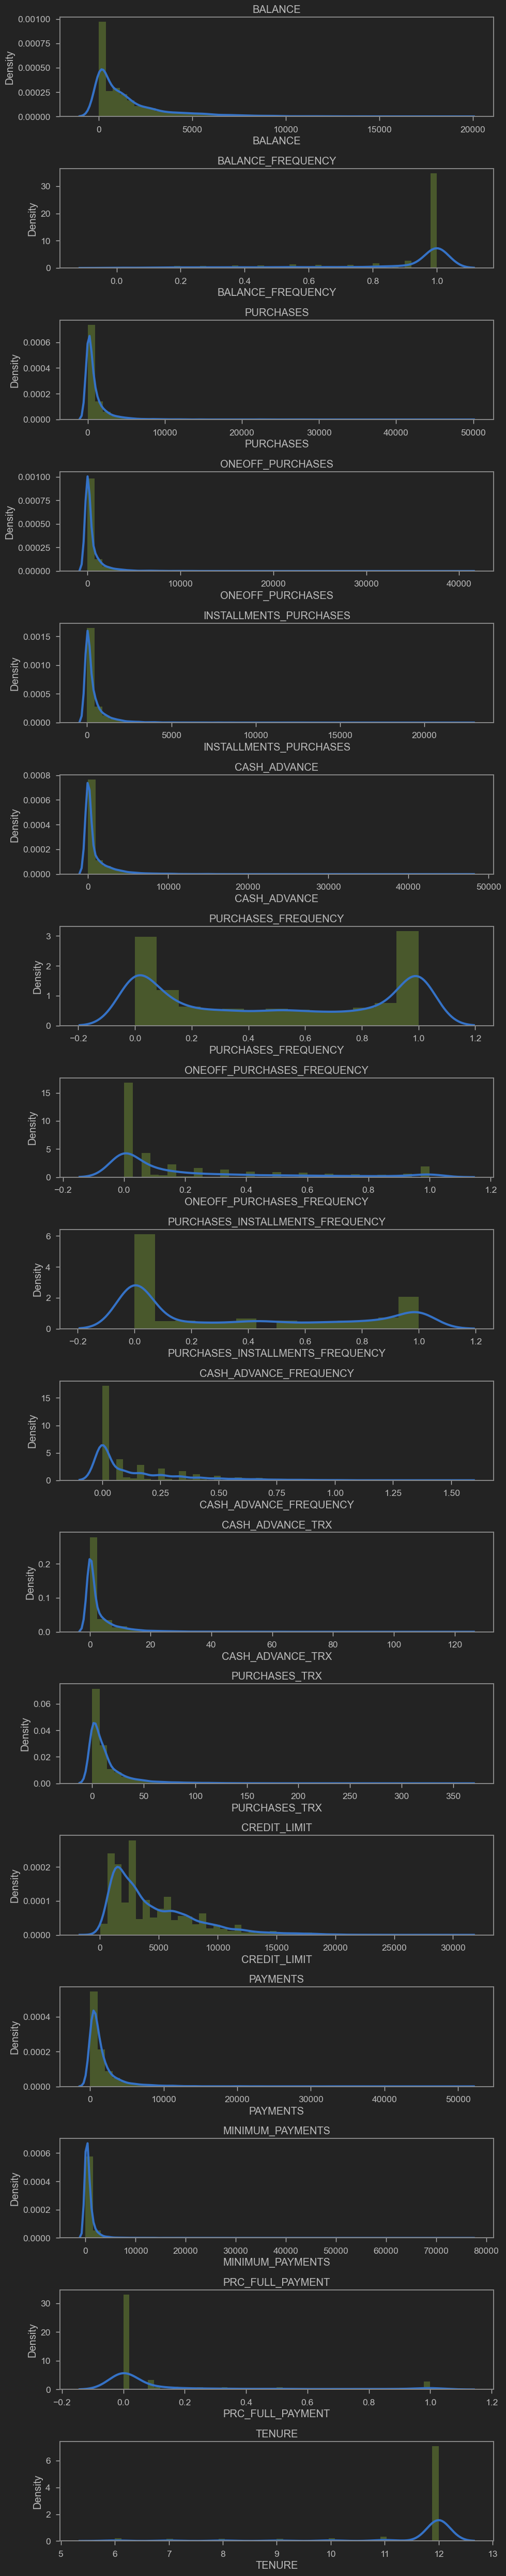

In [22]:
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable. 
# KDE demonstrates the probability density at different values in a continuous variable. 

plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

### The result:
- Mean of balance is `$1500`
- 'Balance_Frequency' for most customers is updated frequently ~1
- For 'PURCHASES_FREQUENCY', there are two distinct group of customers
- For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently 
- Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0
- Credit limit average is around `$4500`
- Most customers are ~11 years tenure

<AxesSubplot:>

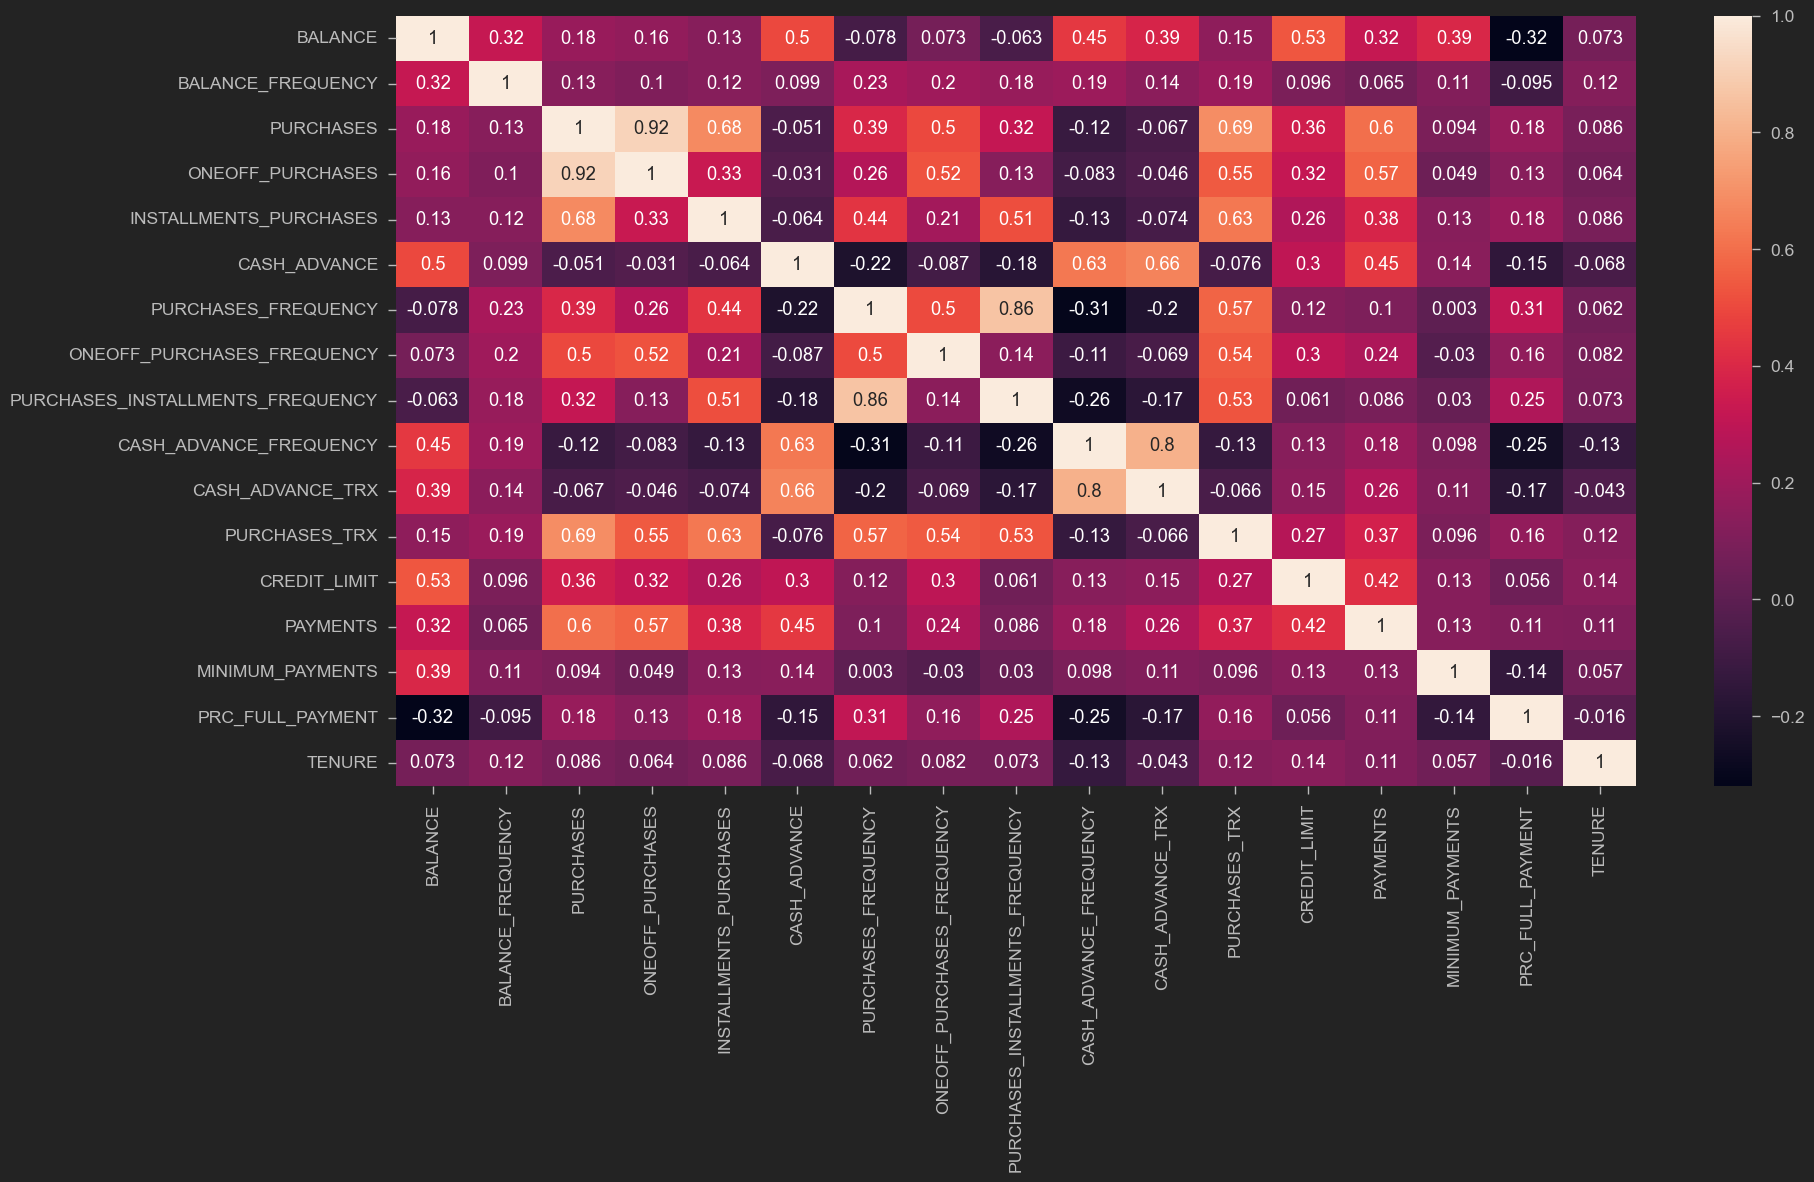

In [23]:
## Create heatmap to check correlations between each columns
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (20,10))
sns.heatmap(correlations, annot = True)

### The are high positive correlation between:
- `ONEOFF_PURCHASES` and `PURCHASES` : **0.92**
- `PURCHASES_INSTALLMENTS_FREQUENCY` and `PURCHASES_FREQUENCY` : **0.86**
- `CASH_ADVANCE_TRX` and `CASH_ADVANCE_FREQUENCY` : **0.80**

## Step 4: Find the Optimal Number of Clusters Using Elbow Method

- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. 
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.<br>
Source:  https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [24]:
## Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

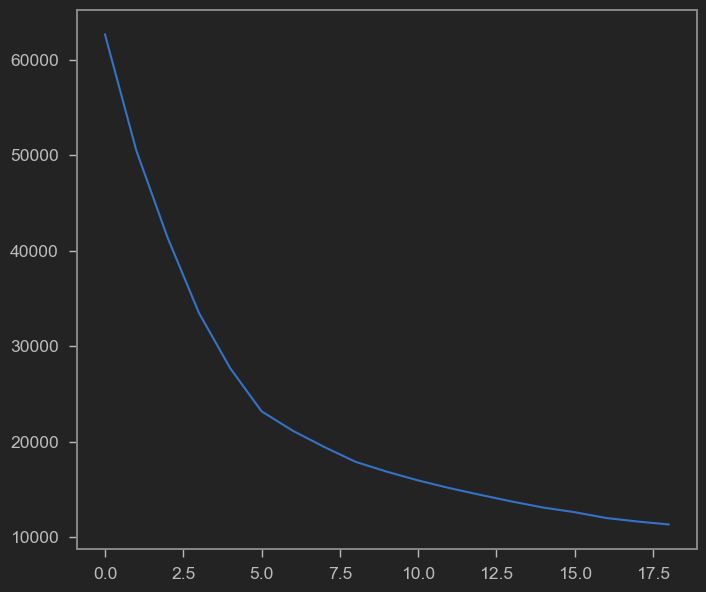

In [26]:
## Let's visualize the graph
scores_1 = []
range_values = range(1,20)

for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(creditcard_df_scaled[:, :7])
    scores_1.append(kmeans.inertia_)
    
plt.plot(scores_1, 'bx-')

From this we can observe that, 4th cluster seems to be forming the elbow of the curve. <br>
However, the values does not reduce linearly until 8th cluster. <br>
Let's choose the number of clusters to be 7.

## Step 5: Apply K-Means Method

In [28]:
kmeans = KMeans(7)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [29]:
kmeans.cluster_centers_.shape

(7, 17)

In [30]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.142744,0.431066,0.956807,0.902858,0.603623,-0.306496,1.099690,1.870947,0.547355,-0.407272,-0.316635,1.217624,0.715672,0.400715,-0.030079,0.466529,0.307348
1,0.009475,0.402034,-0.343187,-0.223246,-0.401207,-0.103601,-0.814135,-0.334433,-0.758238,0.086615,-0.040499,-0.465389,-0.300832,-0.247710,-0.014945,-0.452436,0.272256
2,1.410946,0.413379,7.127807,6.300978,5.274909,0.010089,1.084767,1.885460,1.038774,-0.294900,-0.112444,4.742082,2.166018,4.905174,1.100473,0.847509,0.333004
3,-0.369517,0.332654,-0.042910,-0.231901,0.324412,-0.368126,0.973362,-0.347297,1.162140,-0.477424,-0.362728,0.168218,-0.276989,-0.224687,-0.031034,0.296290,0.252897
4,1.663514,0.392529,-0.201668,-0.148387,-0.204317,1.993571,-0.454698,-0.187770,-0.402637,1.910410,1.925710,-0.237859,1.008663,0.837135,0.551374,-0.390842,0.069807
5,-0.701882,-2.133384,-0.306746,-0.230358,-0.301974,-0.323199,-0.546483,-0.427927,-0.440794,-0.522378,-0.376899,-0.416139,-0.172939,-0.201852,-0.257584,0.297197,0.200916
6,-0.335506,-0.348076,-0.284525,-0.208973,-0.288475,0.065539,-0.198735,-0.272572,-0.230755,0.304112,-0.002216,-0.385586,-0.556898,-0.390701,-0.209383,0.012899,-3.193765


In [31]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1861.584797,0.979386,3047.437756,2090.996836,956.916733,336.135140,0.931709,0.760597,0.581970,0.053645,1.088025,44.975416,7098.356283,2893.174753,794.109057,0.290166,11.928628
1,1584.195429,0.972509,269.980872,221.894426,48.261254,761.615456,0.163599,0.102690,0.063094,0.152477,2.972448,3.141999,3399.899918,1016.048351,829.377869,0.021385,11.881667
2,4501.239524,0.975196,16231.873333,11050.770741,5181.102593,1000.029225,0.925720,0.764927,0.777273,0.076132,2.481481,132.580247,12375.308642,15933.142123,3428.812651,0.401597,11.962963
3,795.355818,0.956073,911.527101,207.530019,704.429453,206.894282,0.881008,0.098852,0.826301,0.039607,0.773475,18.891094,3486.650630,1082.698011,791.883111,0.240374,11.855760
4,5026.939291,0.970257,572.337864,346.144978,226.306611,5159.481946,0.307858,0.146442,0.204419,0.517437,16.390380,8.797539,8164.378686,4156.566963,2149.161009,0.039400,11.610738
5,103.566909,0.371892,347.837146,210.090875,137.996103,301.107446,0.271021,0.074799,0.189255,0.030611,0.676768,4.366162,3865.226805,1148.803276,263.917593,0.240640,11.786195
6,866.148306,0.794815,395.311749,245.585564,150.203132,1116.308792,0.410589,0.121144,0.272729,0.196000,3.233704,5.125596,2468.226470,602.104087,376.247870,0.157487,7.243243


- First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and careful with their money, Cluster with lowest balance (`$104`) and cash advance (`$303`), Percentage of full payment = 23%
- Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance (`$5000`) and cash advance (`~$5000`), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
- Third customer cluster (VIP/Prime): high credit limit `$16K` and highest percentage of full payment, target for increase credit limit and increase spending habits
- Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance 


In [32]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,4
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


## Step 6: Presenting the K-Means Algorithm Result

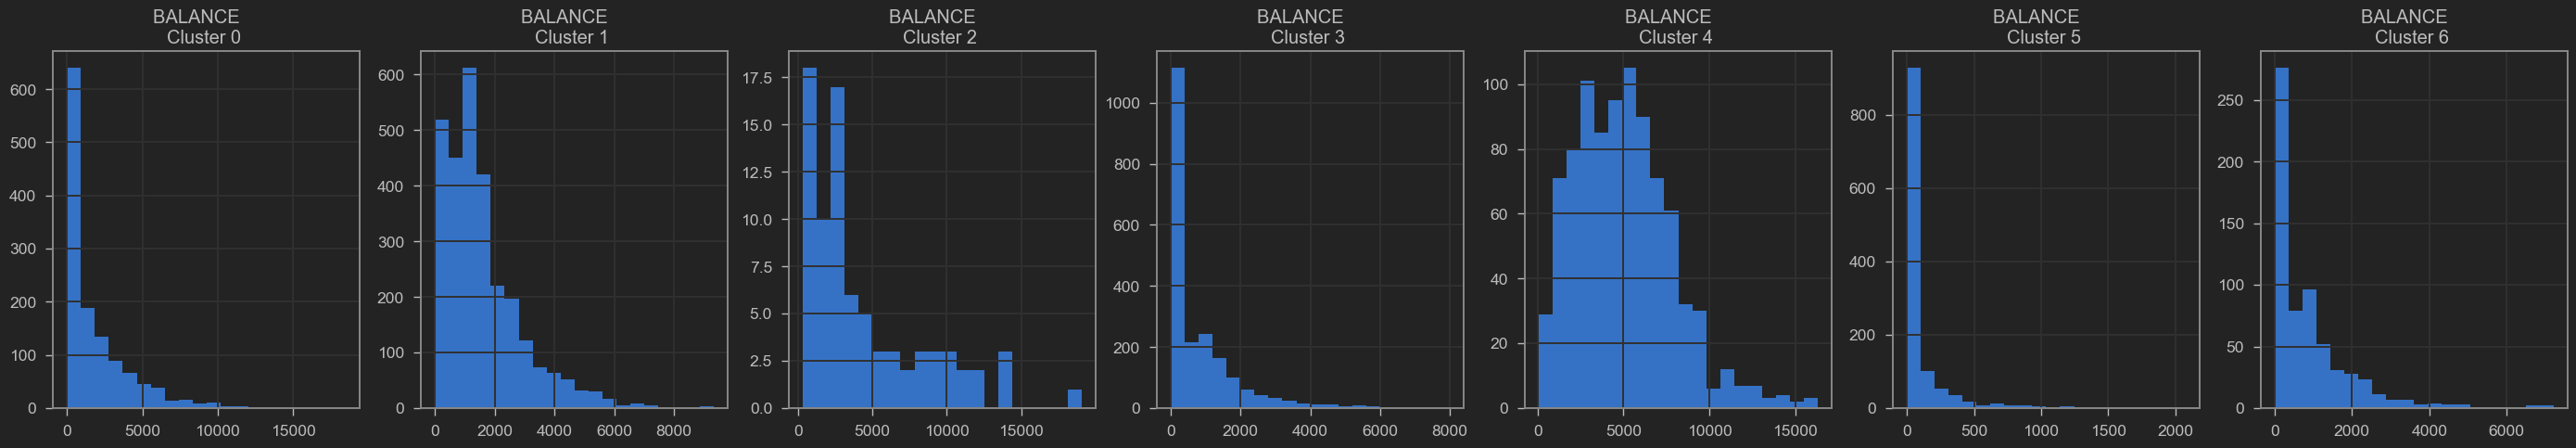

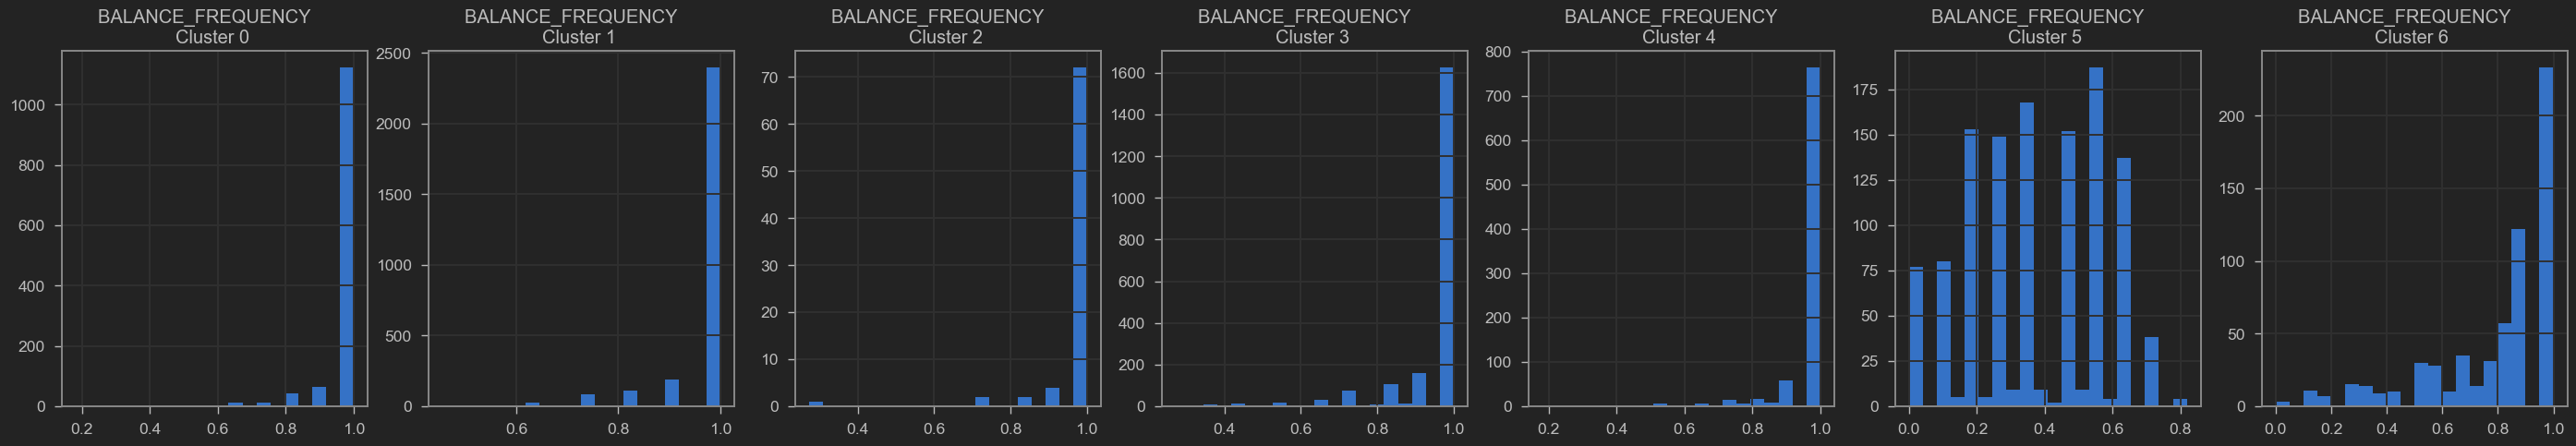

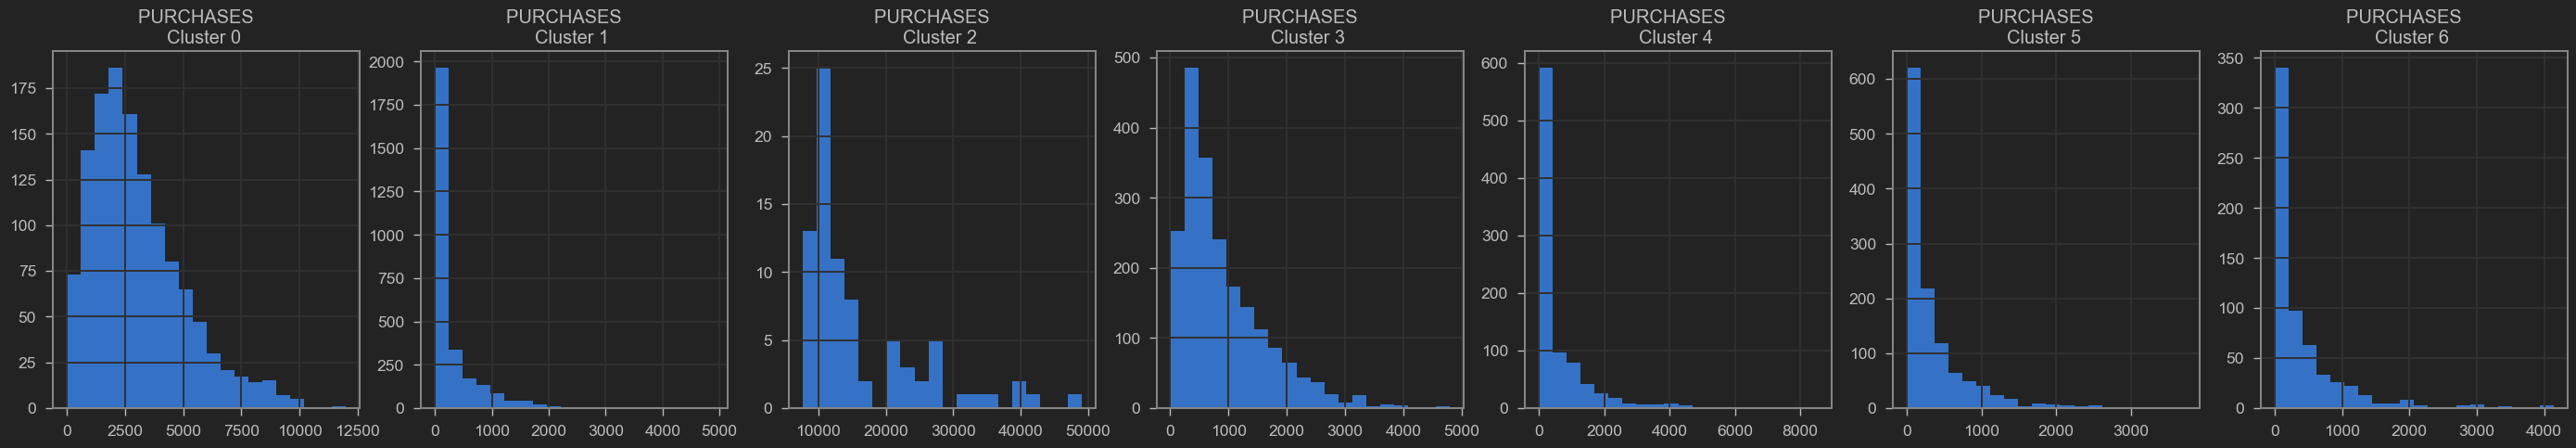

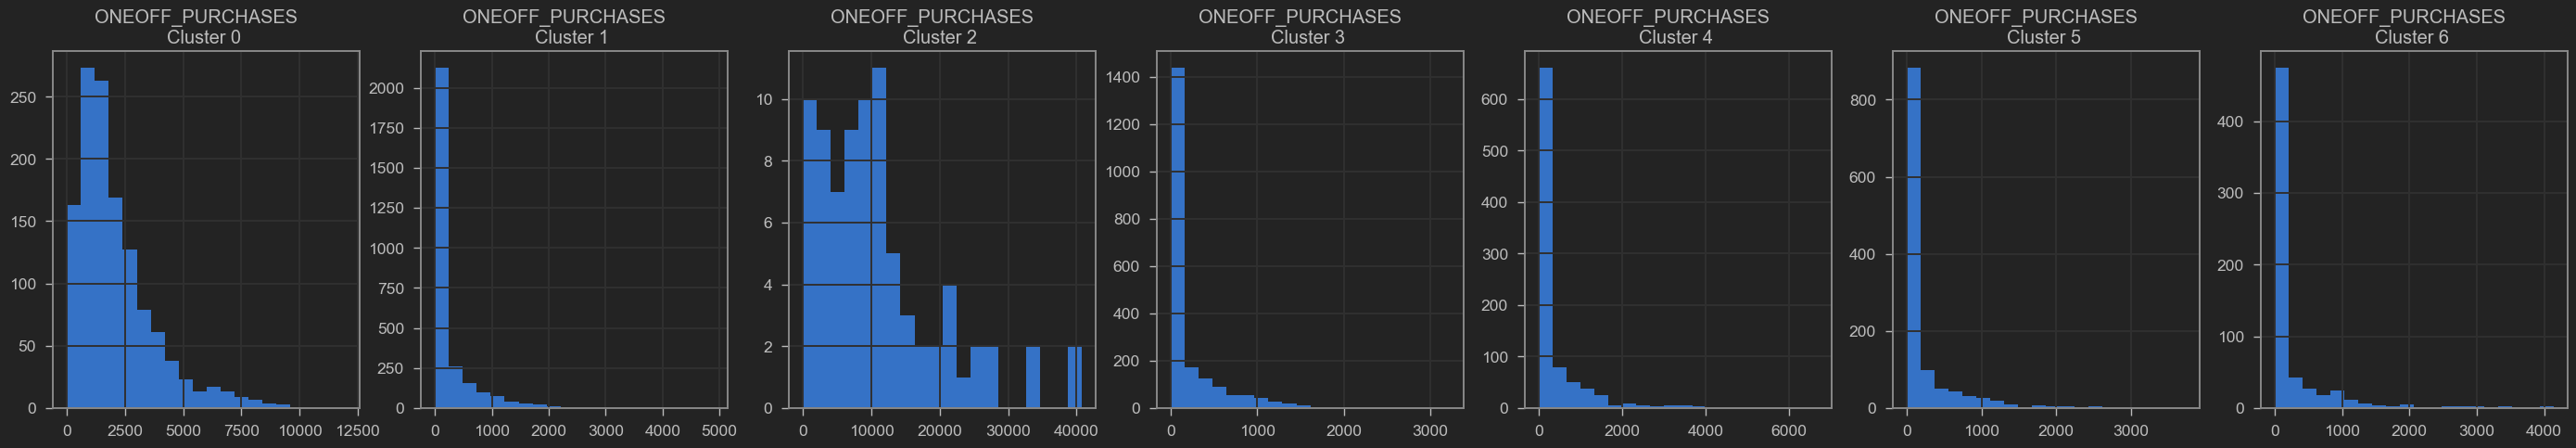

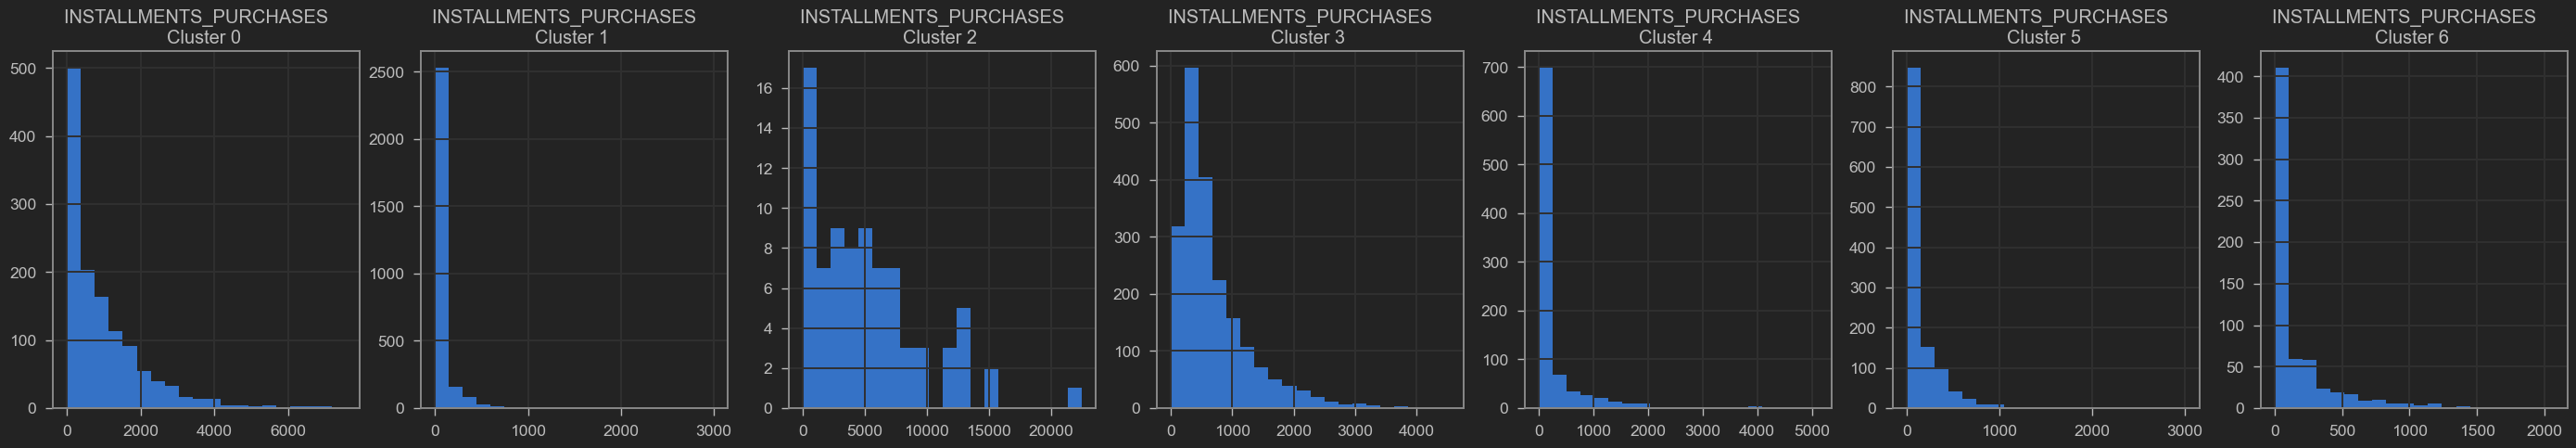

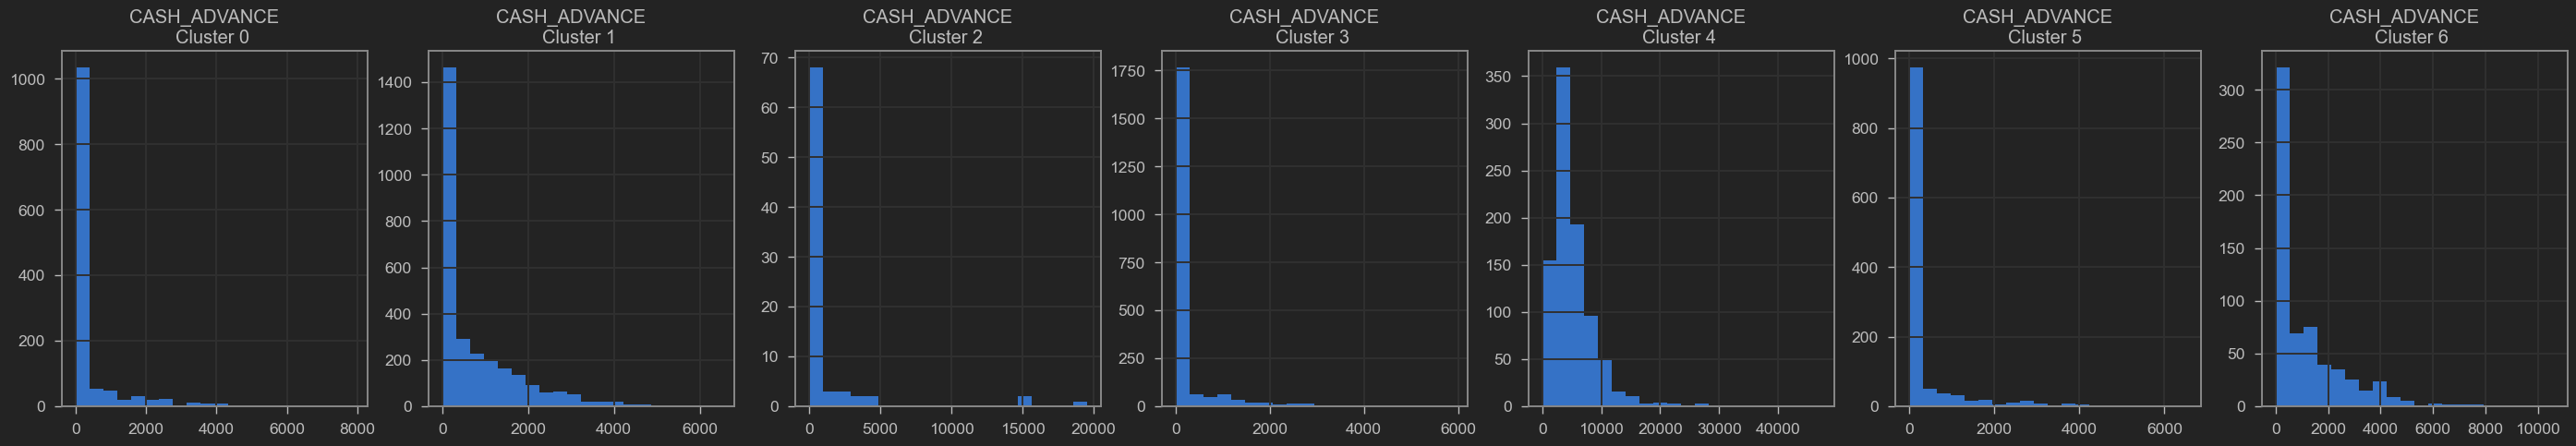

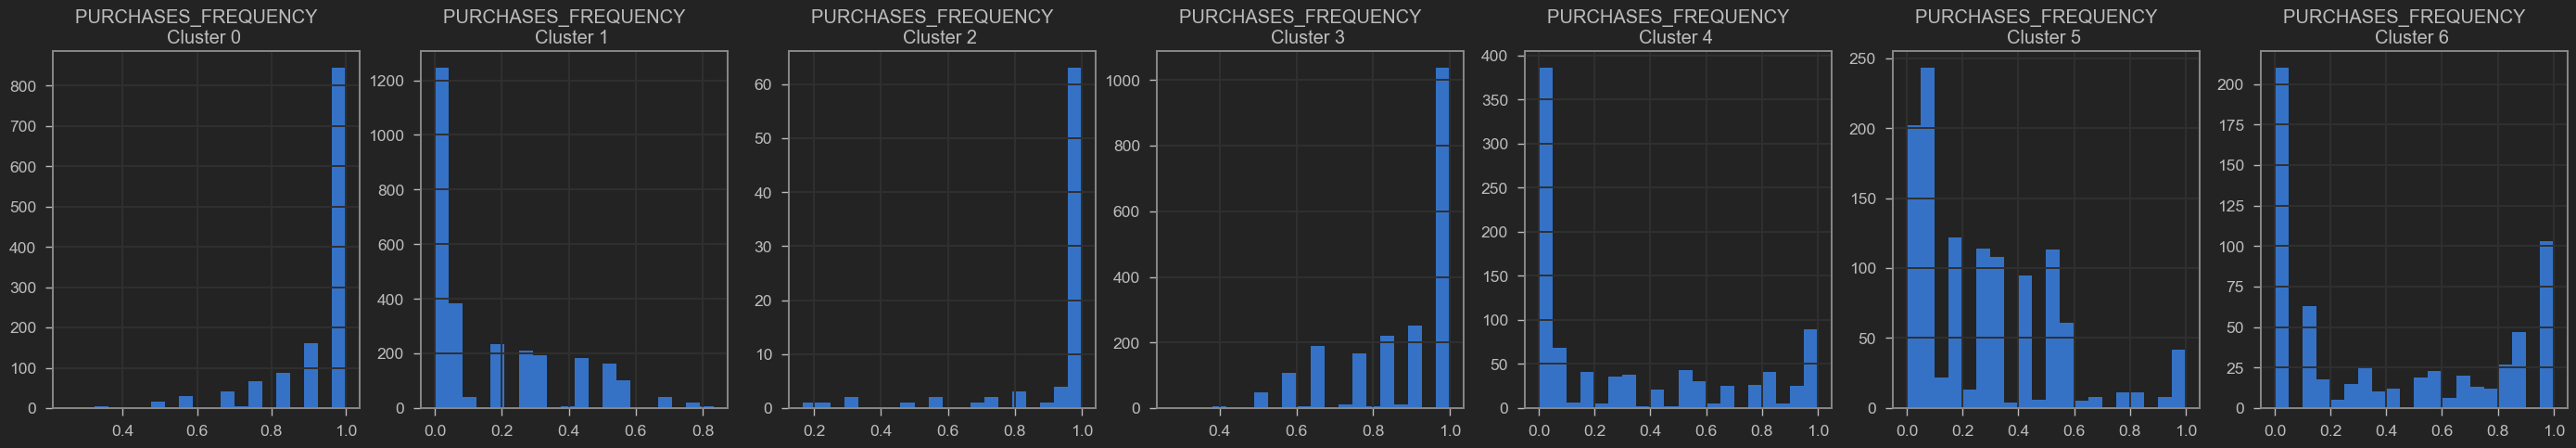

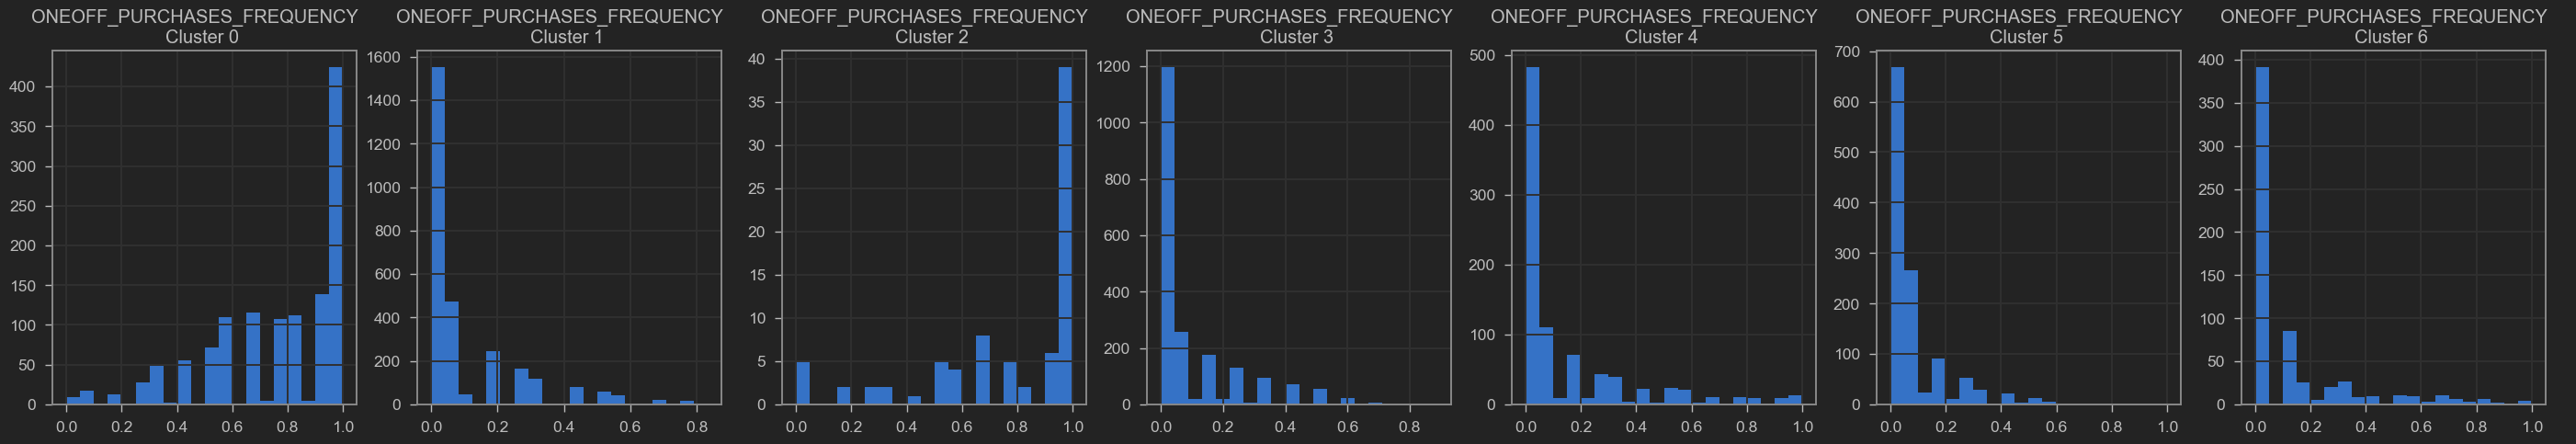

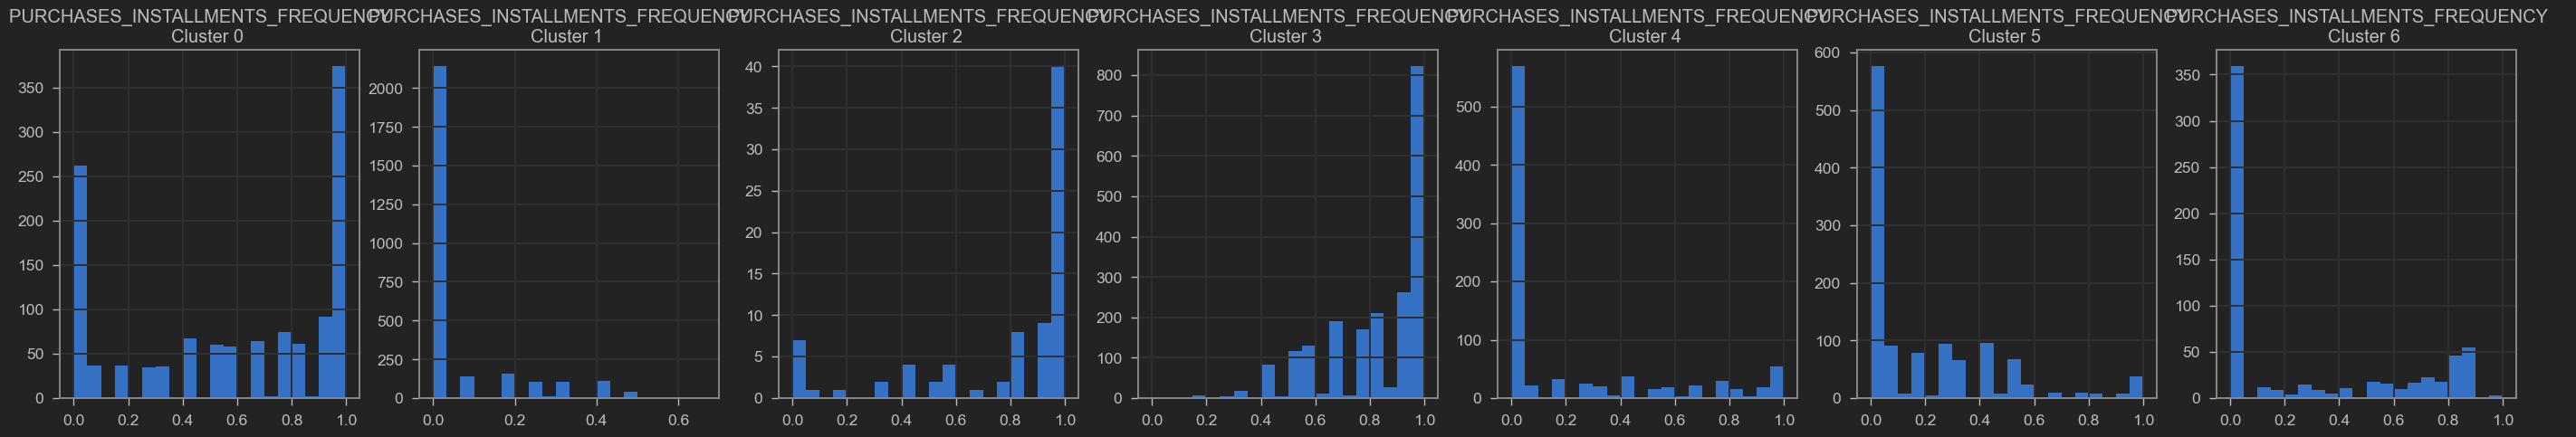

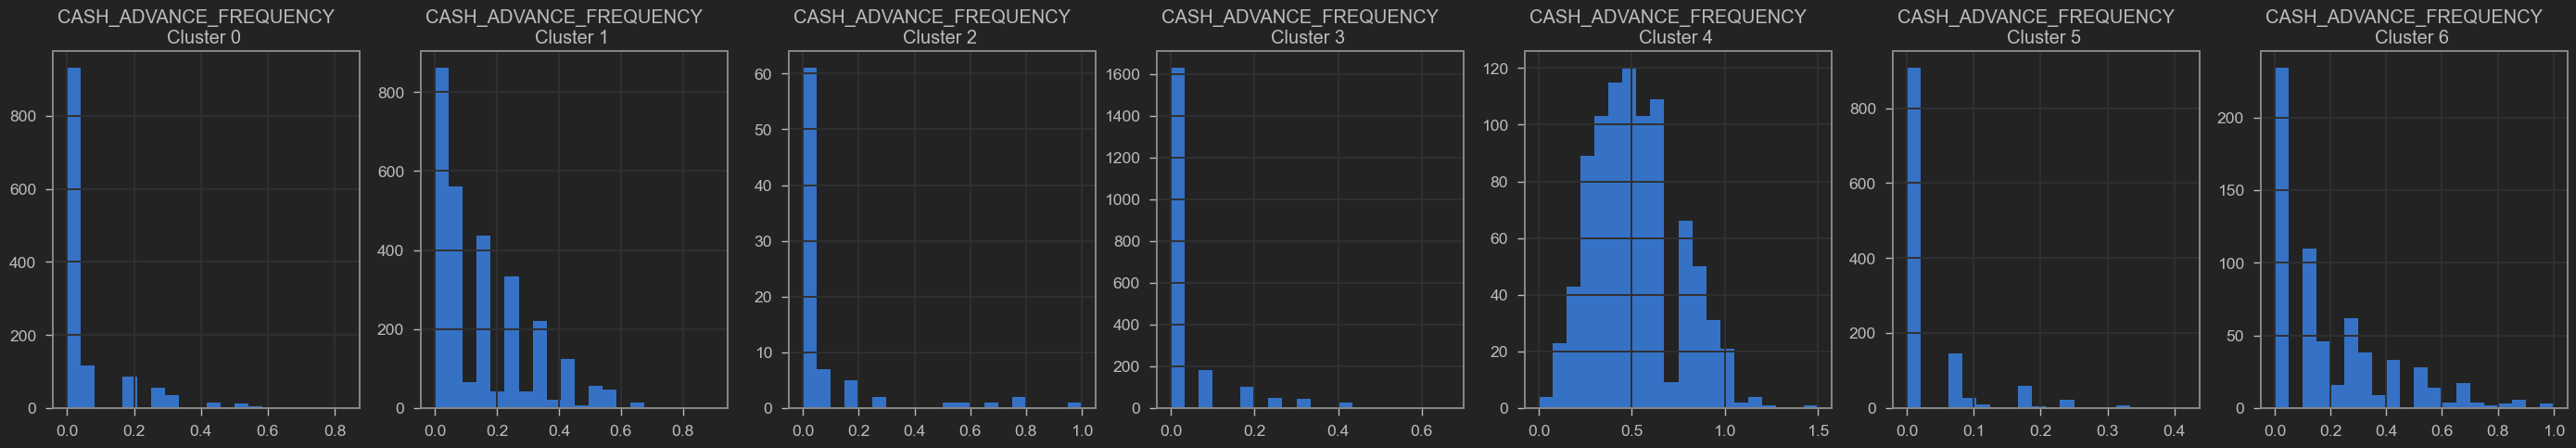

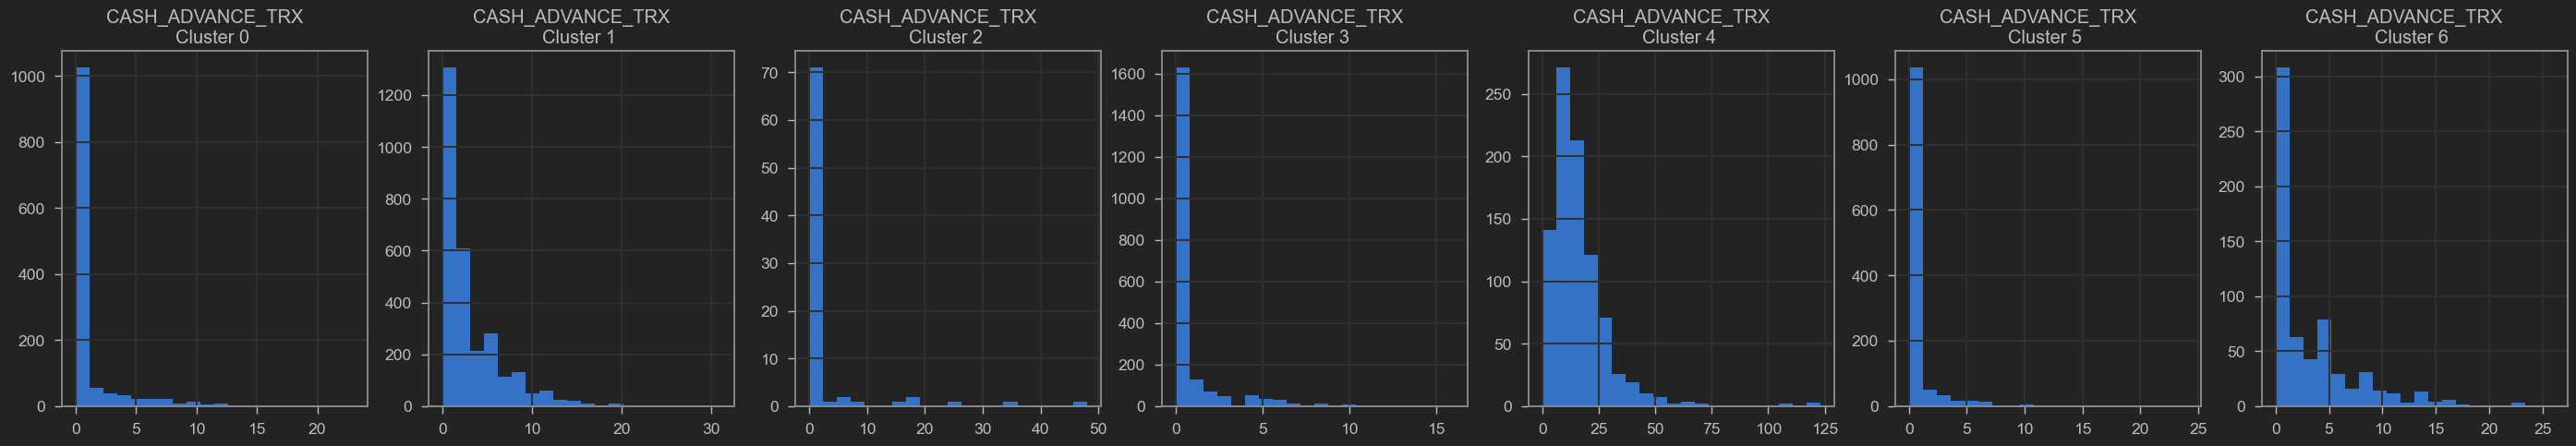

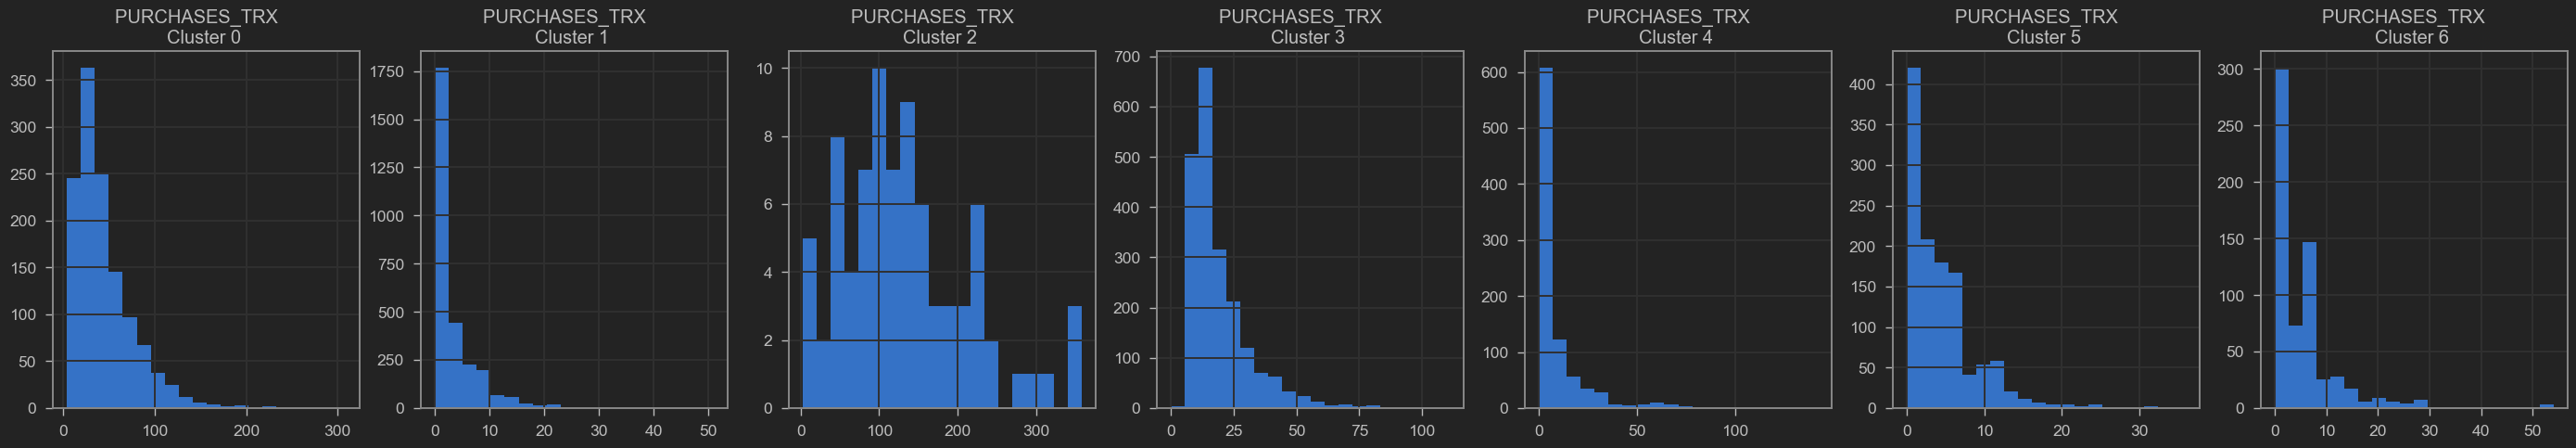

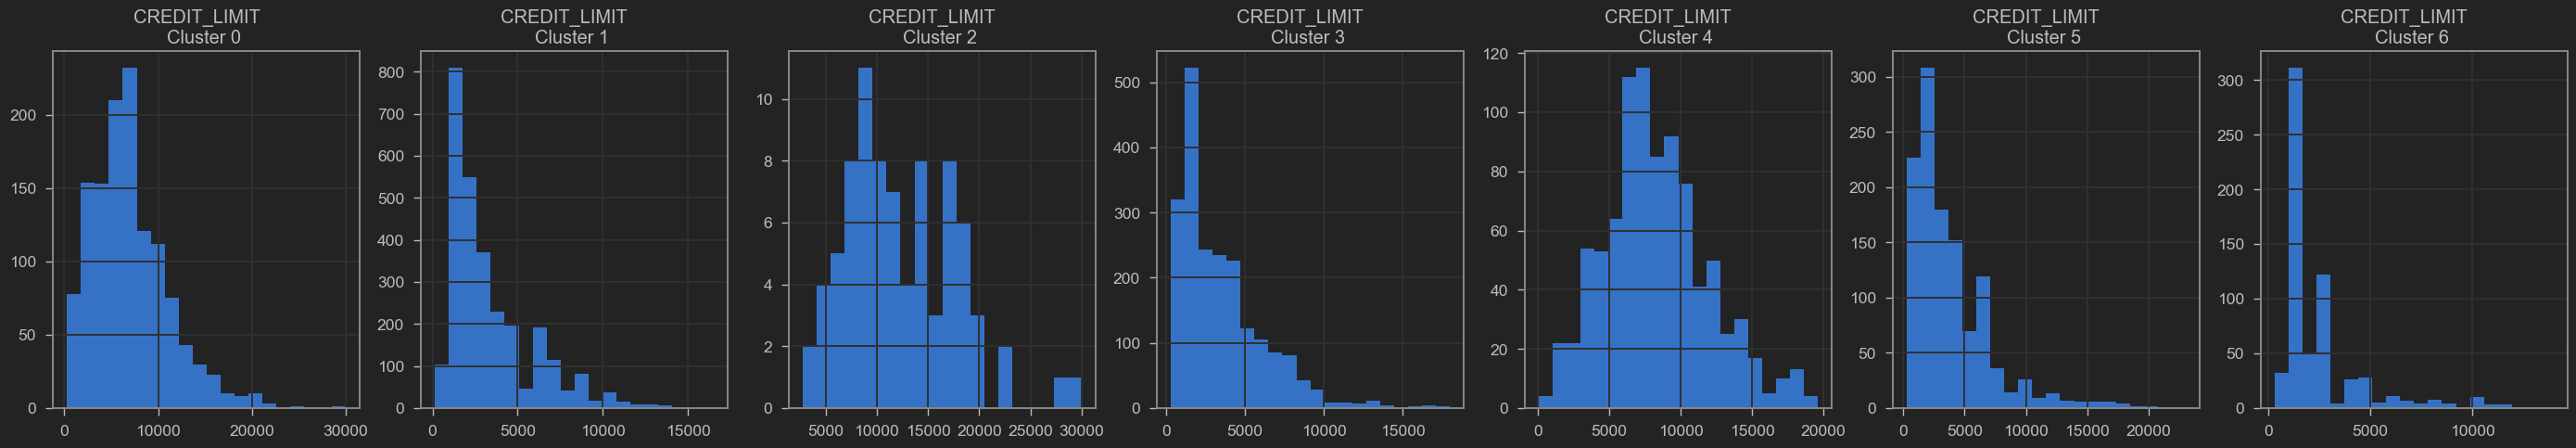

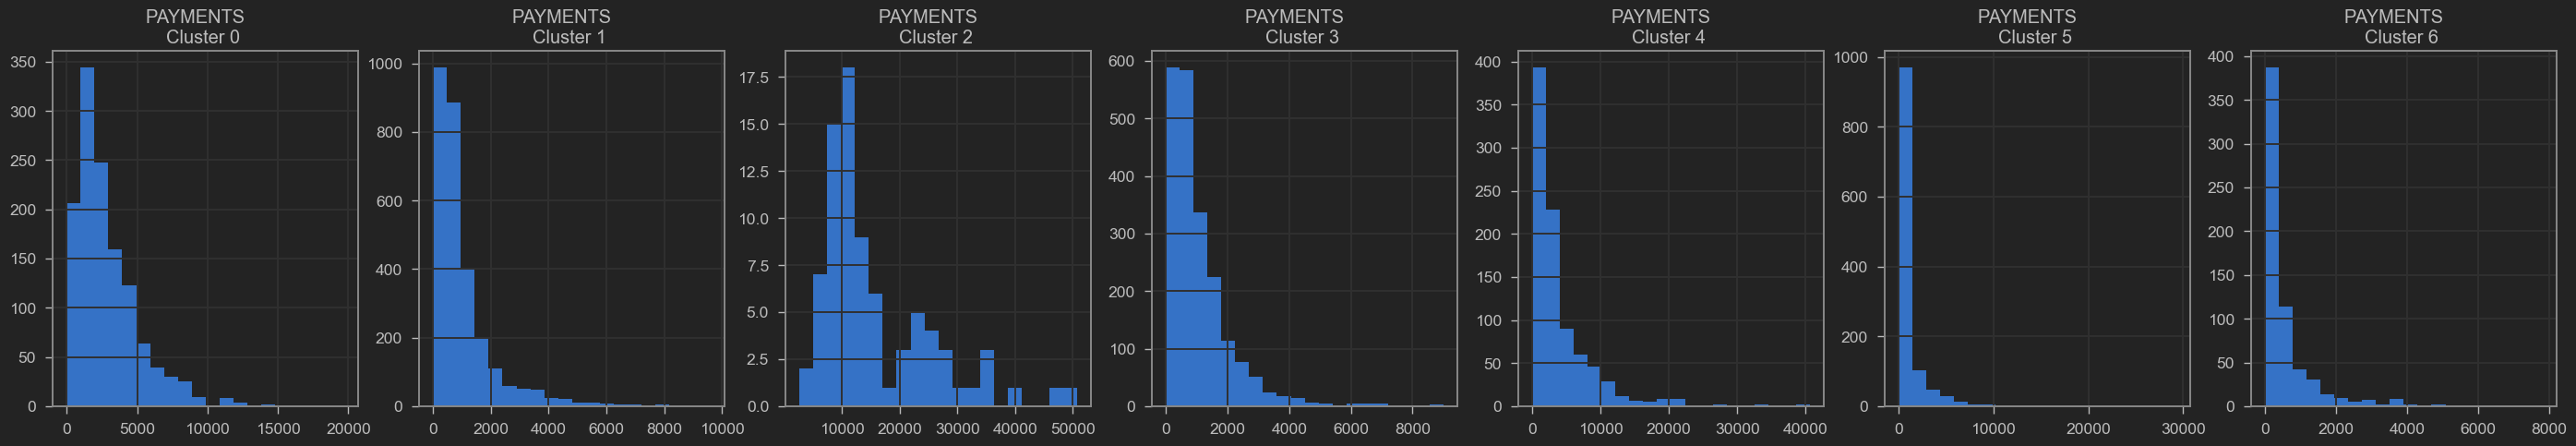

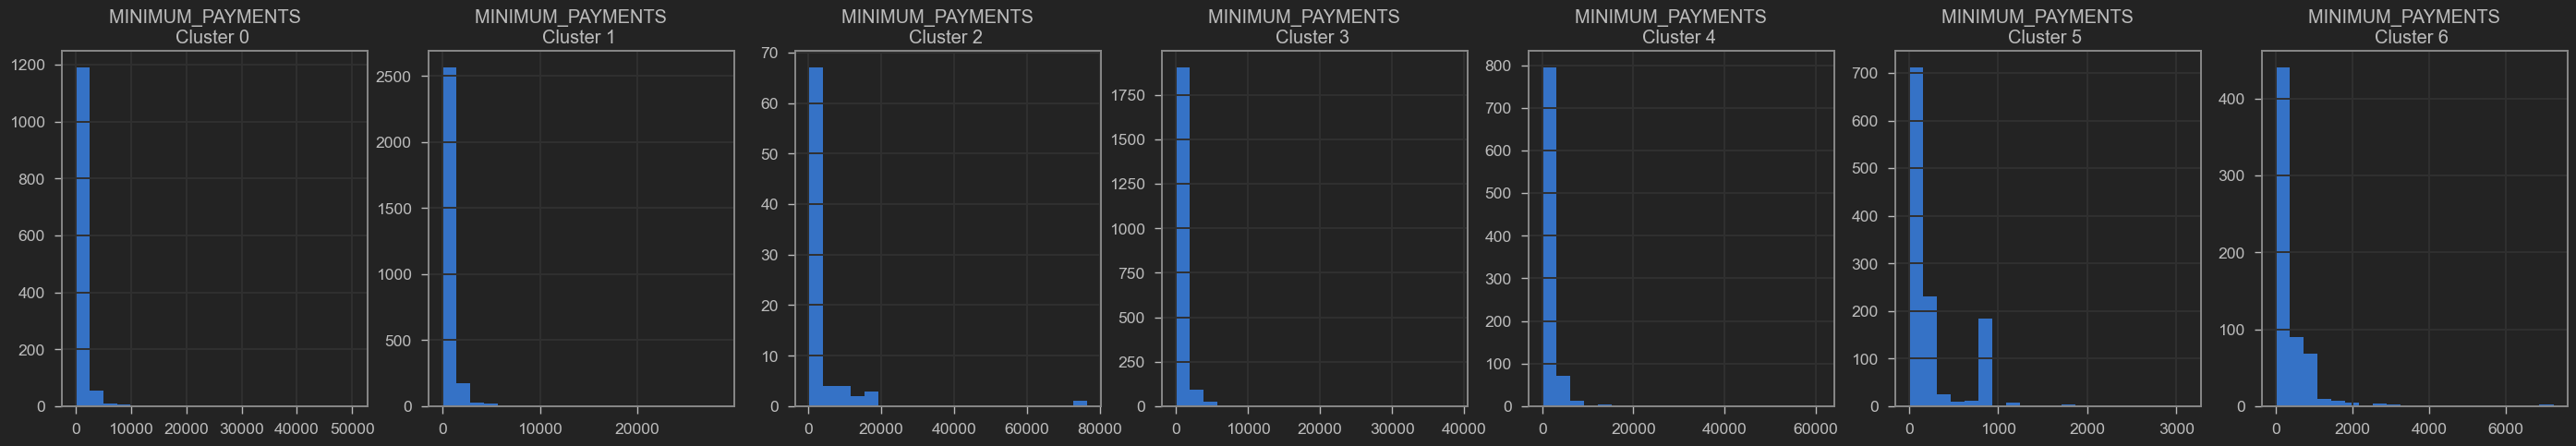

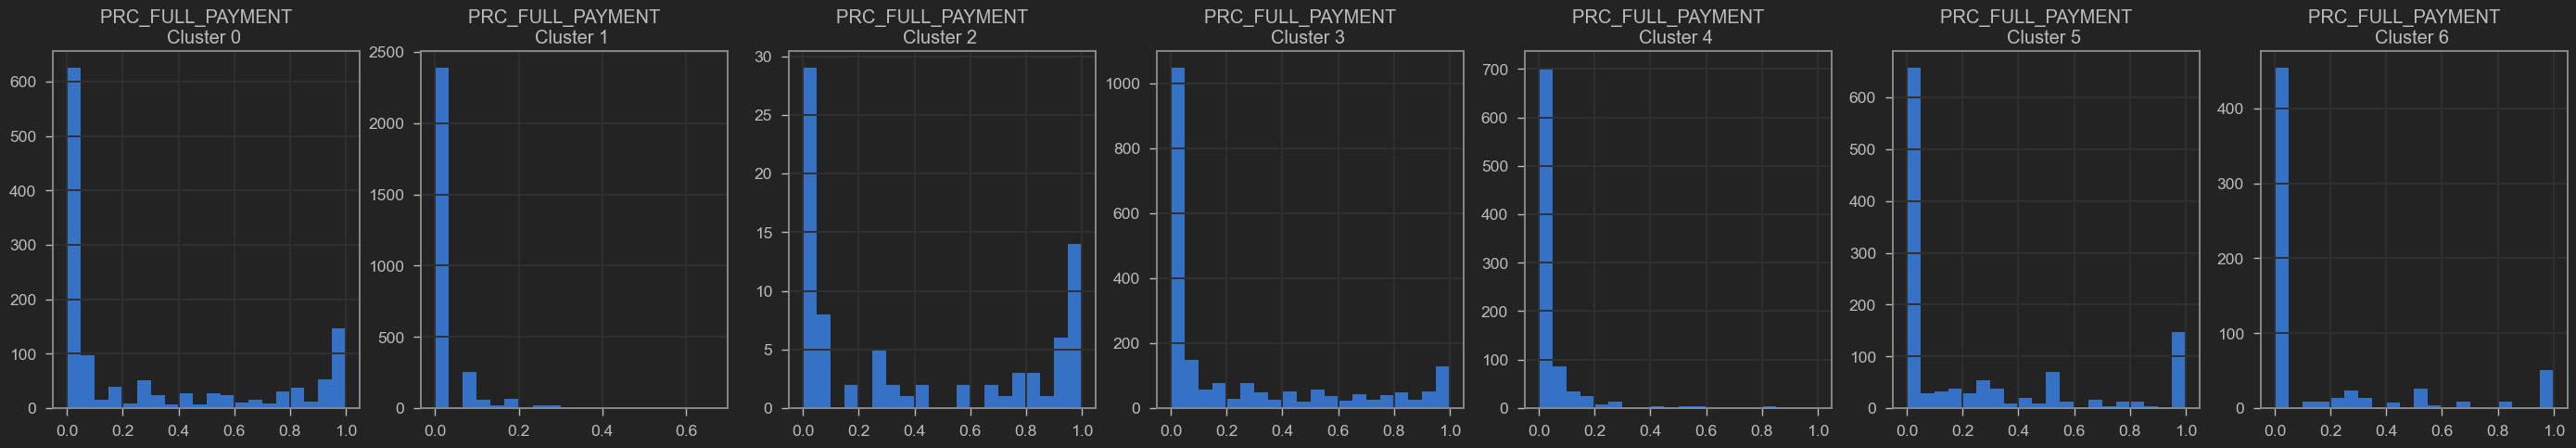

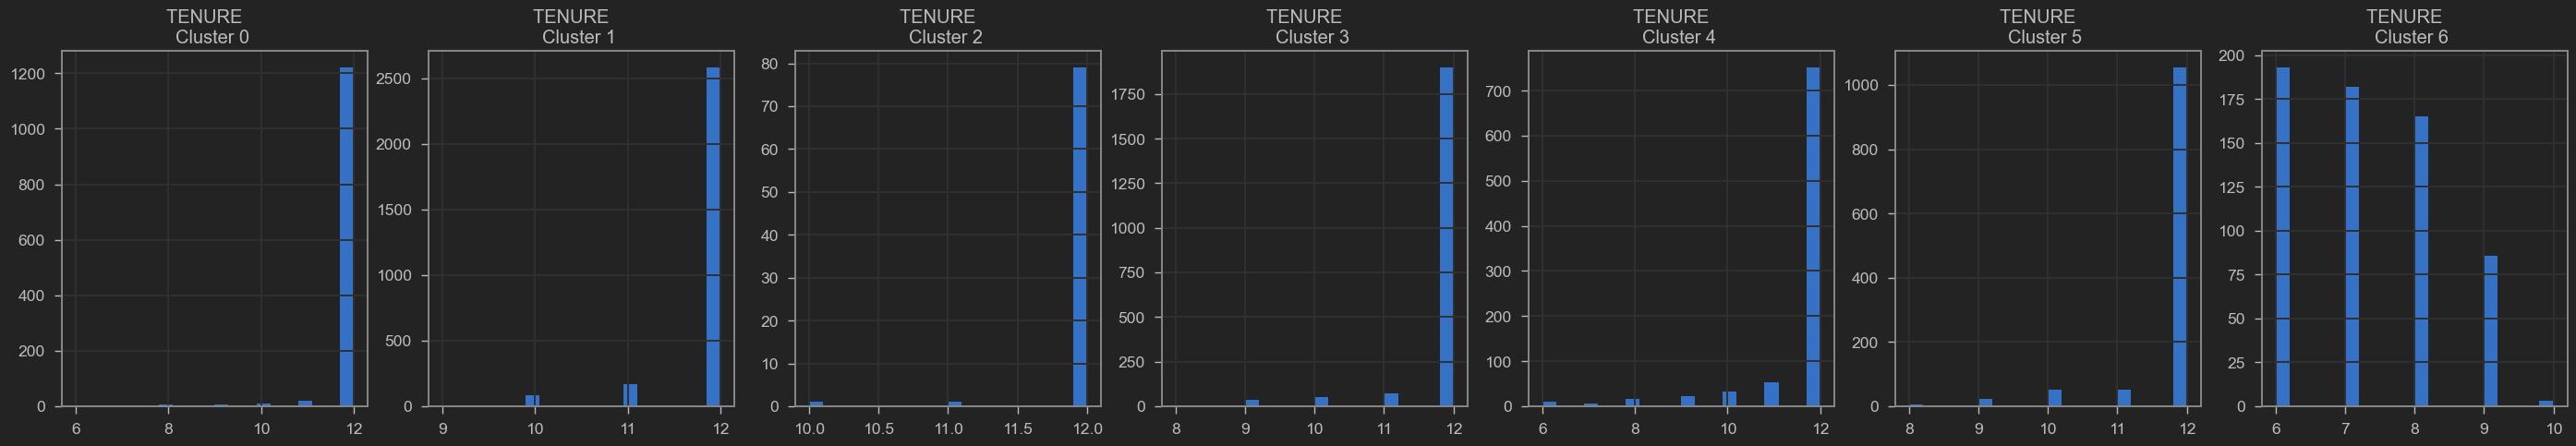

In [33]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(7):
    plt.subplot(1,7,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))
  
plt.show()

### Result:
The graph offers valuable insights into the distinctive traits of each cluster, which can significantly help the marketing team fine-tune their campaign strategies for each group. Additionally, in future research, we can eliminate less influential variables to attain more precise results.